In [4]:
# import modules
import pandas as pd
import numpy as np
import scipy.stats as scistat
import statsmodels.api as sm

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
date = "20230103"

In [6]:
# load data
csv_file = r"D:\cdu\data\zonal_stats\output\{0}\merged_slats_field_agb_dp0_tile.csv".format(date)

In [7]:
df = pd.read_csv(csv_file, parse_dates=['date'])
# set uid to index
df.set_index("uid_x", inplace=True)
df.shape

(167, 64)

In [8]:
df.columns

Index(['site', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha',
       'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha',
       'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha',
       'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha',
       'basal_dt', 'uid_y', 'image', 'year', 'month', 'day', 'b1_dp0_min',
       'b1_dp0_max', 'b1_dp0_mean', 'b1_dp0_count', 'b1_dp0_std', 'b1_dp0_med',
       'b1_dp0_p25', 'b1_dp0_p50', 'b1_dp0_p75', 'b1_dp0_p95', 'b1_dp0_p99',
       'b1_dp0_range', 'b2_dp0_min', 'b2_dp0_max', 'b2_dp0_mean',
       'b2_dp0_count', 'b2_dp0_std', 'b2_dp0_med', 'b2_dp0_p25', 'b2_dp0_p50',
       'b2_dp0_p75', 'b2_dp0_p95', 'b2_dp0_p99', 'b2_dp0_range', 'b3_dp0_min',
       'b3_dp0_max', 'b3_dp0_mean', 'b3_dp0_count', 'b3_dp0_med', 'b3_dp0_p25',
       'b3_dp0_p50', 'b3_dp0_p75', 'b3_dp0_p95', 'b3_dp0_p99', 'b3_dp0_range',
       'b3_dp0_std', 'im_date', 'image_dt'],
      dtype='object')

In [9]:
# drop unwanted columns
df.drop(['date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 
         'bio_s_kg1ha', 'bio_r_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 
         'c_r_kg1ha', 'c_agb_kg1ha', 'im_date', 'image_dt', 'b3_dp0_count', 'basal_dt', 'uid_y', 'image', 'year', 
         'month', 'day', 'b2_dp0_count', 'b3_dp0_range', 'b2_dp0_range', 'b1_dp0_range', 'b1_dp0_count'], axis=1, inplace=True)

In [10]:
#drop null values
df.dropna(inplace=True)

In [11]:
df.index.nunique()

70

In [12]:
df.sample(8, random_state=2).T

uid_x,99,122,28,45,6,13,108,14
site,legu03,nt004,amg05,barkely04,girra02,ntagfu0008,jdr04,ntagfu0009
bio_agb_kg1ha,0,0,24670.8,0,3123.12,0,3742.2,1947.59
b1_dp0_min,42,35,4,8,1,10,6,3
b1_dp0_max,63,40,13,11,5,14,9,25
b1_dp0_mean,54.75,38.5,9.25,9.22222,2.33333,12.2222,7.25,13.875
b1_dp0_std,6.3656,1.80278,2.34965,1.0304,1.41421,1.5476,1.08972,7.14033
b1_dp0_med,56.5,39,9.5,9,2,12,7,13
b1_dp0_p25,48.75,38,8,9,1,11,6.75,8
b1_dp0_p50,56.5,39,9.5,9,2,12,7,13
b1_dp0_p75,59.5,40,11,9,3,14,7.5,20.25


In [13]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (df.describe())

       bio_agb_kg1ha  b1_dp0_min  b1_dp0_max  b1_dp0_mean  b1_dp0_std  \
count      91.000000   91.000000   91.000000    91.000000   91.000000   
mean     6486.206717    9.164835   17.054945    12.906029    2.398306   
std      8783.689601   11.033549   14.988412    13.085735    2.023557   
min         0.000000    1.000000    2.000000     1.250000    0.433013   
25%         0.000000    2.000000    6.000000     3.472222    1.042434   
50%      3086.160000    5.000000   12.000000     8.083333    1.727534   
75%      8501.702010   12.000000   24.000000    16.513889    3.008101   
max     35199.710000   52.000000   63.000000    57.333333   13.775986   

       b1_dp0_med  b1_dp0_p25  b1_dp0_p50  b1_dp0_p75  b1_dp0_p95  b1_dp0_p99  \
count   91.000000   91.000000   91.000000   91.000000   91.000000   91.000000   
mean    12.862637   11.346154   12.862637   14.343407   16.303846   16.904725   
std     13.416214   12.476465   13.416214   13.998445   14.697566   14.926747   
min      1.000000 

In [14]:
key_var = ['bio_agb_kg1ha', 'b1_dp0_mean', 'b1_dp0_med', 'b2_dp0_mean', 'b2_dp0_med', 'b3_dp0_mean', 'b3_dp0_med']

In [15]:
df_key = df[key_var]

In [16]:
df_key

,bio_agb_kg1ha,b1_dp0_mean,b1_dp0_med,b2_dp0_mean,b2_dp0_med,b3_dp0_mean,b3_dp0_med
uid_x,,,,,,,
119,0.00000,5.333333,5.0,19.333333,18.0,73.666667,75.0
42,0.00000,14.555556,15.0,5.333333,5.0,78.888889,79.0
45,0.00000,9.222222,9.0,7.111111,7.0,82.000000,82.0
47,0.00000,12.333333,13.0,4.888889,5.0,81.222222,81.0
48,1894.20000,9.222222,9.0,2.333333,2.0,87.111111,88.0
...,...,...,...,...,...,...,...
5,20805.21761,3.166667,3.0,63.166667,62.5,32.250000,32.5
1,30472.44667,2.222222,2.0,58.444444,58.0,37.888889,38.0
2,24414.13022,2.333333,2.0,35.444444,36.0,60.666667,60.0


In [17]:
df_key.describe()

,bio_agb_kg1ha,b1_dp0_mean,b1_dp0_med,b2_dp0_mean,b2_dp0_med,b3_dp0_mean,b3_dp0_med
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,6486.206717,12.906029,12.862637,34.648489,34.543956,50.968727,50.972527
std,8783.689601,13.085735,13.416214,21.123624,21.186034,20.460075,20.640355
min,0.000000,1.250000,1.000000,2.000000,1.500000,12.300000,12.500000
25%,0.000000,3.472222,3.000000,16.472222,16.500000,35.500000,36.000000
50%,3086.160000,8.083333,8.000000,34.666667,34.000000,47.555556,46.000000
75%,8501.702010,16.513889,15.750000,53.125000,53.500000,66.194444,66.750000
max,35199.710000,57.333333,58.000000,83.700000,84.000000,93.777778,94.000000


Substantial differences between the mean and median, as an indication of skewness.

The interquartile range is also the target value, with the 75th percentile value being about 800 times larger than the 25th percentile value (9210.71, 18.48). We can compare that with the band median and means; b2 has the largest distribution and woyld likly be better at explaining the differences with the target vale; however, the 75th percentile value being about 5 times larger than the 25th percentile vale (55, 11).

In [18]:
df_key.quantile(np.arange(0.0, 1.1, 0.1))

,bio_agb_kg1ha,b1_dp0_mean,b1_dp0_med,b2_dp0_mean,b2_dp0_med,b3_dp0_mean,b3_dp0_med
0.0,0.000000e+00,1.250000,1.0,2.000000,1.5,12.300000,12.5
0.1,0.000000e+00,2.333333,2.0,6.166667,6.0,25.333333,27.0
0.2,0.000000e+00,3.166667,3.0,10.777778,10.0,34.333333,34.0
0.3,1.969624e-13,4.000000,4.0,20.888889,21.0,38.083333,37.5
0.4,1.536150e+03,5.333333,5.5,28.666667,29.0,41.555556,41.0
0.5,3.086160e+03,8.083333,8.0,34.666667,34.0,47.555556,46.0
0.6,4.370912e+03,10.166667,10.0,42.250000,42.5,51.500000,51.5
0.7,7.150517e+03,13.875000,13.0,48.500000,49.5,60.666667,59.5
0.8,1.054460e+04,20.833333,22.0,54.888889,55.0,73.125000,73.5
0.9,2.269939e+04,30.000000,30.0,62.000000,60.0,82.888889,84.0


Normal distributions are distributed symmetrically (have low skew), and that they have relatively normal tails (neither excessively high nor excessively low kurtosis).

Expect a value near 0 for skew and 3 for kurtosis

In [19]:
df_key.skew()

bio_agb_kg1ha    1.569058
b1_dp0_mean      1.613508
b1_dp0_med       1.660008
b2_dp0_mean      0.088530
b2_dp0_med       0.088666
b3_dp0_mean      0.429550
b3_dp0_med       0.453399
dtype: float64

In [20]:
df_key.kurtosis()

bio_agb_kg1ha    1.476273
b1_dp0_mean      2.140202
b1_dp0_med       2.292647
b2_dp0_mean     -1.078950
b2_dp0_med      -1.087606
b3_dp0_mean     -0.786048
b3_dp0_med      -0.804691
dtype: float64

### Shapiro-Wilk test

Shapiro-Wilk test on the distribution.
P-values less than 0.05 indicate that we can reject the null hypothesis of normal distribution.

Note: non normal distribution may limit the models (i.e. linear regression)

In [21]:
for var in key_var[1:]:

      stat, p = scistat.shapiro(df_key[var].dropna())

      print("feature=", var, "     p-value=", '{:.6f}'.format(p))

feature= b1_dp0_mean      p-value= 0.000000
feature= b1_dp0_med      p-value= 0.000000
feature= b2_dp0_mean      p-value= 0.003764
feature= b2_dp0_med      p-value= 0.003412
feature= b3_dp0_mean      p-value= 0.002068
feature= b3_dp0_med      p-value= 0.001166


## Identifying extreme values and outliers in univariate analysis

In [22]:
df_key

,bio_agb_kg1ha,b1_dp0_mean,b1_dp0_med,b2_dp0_mean,b2_dp0_med,b3_dp0_mean,b3_dp0_med
uid_x,,,,,,,
119,0.00000,5.333333,5.0,19.333333,18.0,73.666667,75.0
42,0.00000,14.555556,15.0,5.333333,5.0,78.888889,79.0
45,0.00000,9.222222,9.0,7.111111,7.0,82.000000,82.0
47,0.00000,12.333333,13.0,4.888889,5.0,81.222222,81.0
48,1894.20000,9.222222,9.0,2.333333,2.0,87.111111,88.0
...,...,...,...,...,...,...,...
5,20805.21761,3.166667,3.0,63.166667,62.5,32.250000,32.5
1,30472.44667,2.222222,2.0,58.444444,58.0,37.888889,38.0
2,24414.13022,2.333333,2.0,35.444444,36.0,60.666667,60.0


In [23]:
var_ = "bio_agb_kg1ha"

In [24]:
thirdq, firstq = df_key[var_].quantile(0.75), df_key[var_].quantile(0.25)
interquartilerange = 1.5*(thirdq-firstq)
extvalhigh, extvallow = interquartilerange+thirdq, firstq-interquartilerange
print(extvallow, extvalhigh, sep=" <--> ")

-12752.553015542551 <--> 21254.255025904255


In [25]:
df_out.loc[df_out[var_]>extvalhigh].T

NameError: name 'df_out' is not defined

The Howard Springs outliers may be explained by the dense woody veg

In [26]:
df.mean()

bio_agb_kg1ha    6486.206717
b1_dp0_min          9.164835
b1_dp0_max         17.054945
b1_dp0_mean        12.906029
b1_dp0_std          2.398306
b1_dp0_med         12.862637
b1_dp0_p25         11.346154
b1_dp0_p50         12.862637
b1_dp0_p75         14.343407
b1_dp0_p95         16.303846
b1_dp0_p99         16.904725
b2_dp0_min         29.296703
b2_dp0_max         40.131868
b2_dp0_mean        34.648489
b2_dp0_std          3.386245
b2_dp0_med         34.543956
b2_dp0_p25         32.376374
b2_dp0_p50         34.543956
b2_dp0_p75         36.958791
b2_dp0_p95         39.323077
b2_dp0_p99         39.970110
b3_dp0_min         44.076923
b3_dp0_max         57.901099
b3_dp0_mean        50.968727
b3_dp0_med         50.972527
b3_dp0_p25         48.381868
b3_dp0_p50         50.972527
b3_dp0_p75         53.565934
b3_dp0_p95         56.924725
b3_dp0_p99         57.705824
b3_dp0_std          4.219715
dtype: float64

In [27]:
df_out = df.loc[df[var_]<extvalhigh]

In [28]:
df_key_out = df_key.loc[df_key[var_]<extvalhigh]

In [29]:
df_out.mean()

bio_agb_kg1ha    3762.415834
b1_dp0_min         10.100000
b1_dp0_max         18.375000
b1_dp0_mean        14.061163
b1_dp0_std          2.518041
b1_dp0_med         14.031250
b1_dp0_p25         12.446875
b1_dp0_p50         14.031250
b1_dp0_p75         15.562500
b1_dp0_p95         17.620625
b1_dp0_p99         18.224125
b2_dp0_min         26.587500
b2_dp0_max         37.150000
b2_dp0_mean        31.784010
b2_dp0_std          3.310240
b2_dp0_med         31.725000
b2_dp0_p25         29.531250
b2_dp0_p50         31.725000
b2_dp0_p75         34.021875
b2_dp0_p95         36.326250
b2_dp0_p99         36.985250
b3_dp0_min         45.725000
b3_dp0_max         59.612500
b3_dp0_mean        52.676667
b3_dp0_med         52.650000
b3_dp0_p25         50.137500
b3_dp0_p50         52.650000
b3_dp0_p75         55.318750
b3_dp0_p95         58.630625
b3_dp0_p99         59.416125
b3_dp0_std          4.239075
dtype: float64

In [30]:
def getextremevalues(dfin):
    
    dfout = pd.DataFrame(columns=dfin.columns, data=None)
    for col in dfin.columns[1:]:
        thirdq, firstq = dfin[col].quantile(0.75), dfin[col].quantile(0.25)
        interquartilerange = 1.5*(thirdq-firstq)
        extvalhigh, extvallow = interquartilerange+thirdq, firstq-interquartilerange
        #print(extvalhigh, extvallow)
        
        extreme_df = dfin.loc[(dfin[col]>extvalhigh) | (dfin[col]<extvallow)]
        #print(extreme_df)
        print(list(extreme_df))


In [31]:
getextremevalues(df_key)

['bio_agb_kg1ha', 'b1_dp0_mean', 'b1_dp0_med', 'b2_dp0_mean', 'b2_dp0_med', 'b3_dp0_mean', 'b3_dp0_med']
['bio_agb_kg1ha', 'b1_dp0_mean', 'b1_dp0_med', 'b2_dp0_mean', 'b2_dp0_med', 'b3_dp0_mean', 'b3_dp0_med']
['bio_agb_kg1ha', 'b1_dp0_mean', 'b1_dp0_med', 'b2_dp0_mean', 'b2_dp0_med', 'b3_dp0_mean', 'b3_dp0_med']
['bio_agb_kg1ha', 'b1_dp0_mean', 'b1_dp0_med', 'b2_dp0_mean', 'b2_dp0_med', 'b3_dp0_mean', 'b3_dp0_med']
['bio_agb_kg1ha', 'b1_dp0_mean', 'b1_dp0_med', 'b2_dp0_mean', 'b2_dp0_med', 'b3_dp0_mean', 'b3_dp0_med']
['bio_agb_kg1ha', 'b1_dp0_mean', 'b1_dp0_med', 'b2_dp0_mean', 'b2_dp0_med', 'b3_dp0_mean', 'b3_dp0_med']


### QQ plot

Quantile-quantile (Q-Q) plots can improve our sense of that distribution by allowing us to view it graphically relative to a theoretical distribution: normal, uniform, log, or others.

 - Negative skew have an umbrella-like shape
 - Positive skew have a bowl-like shape

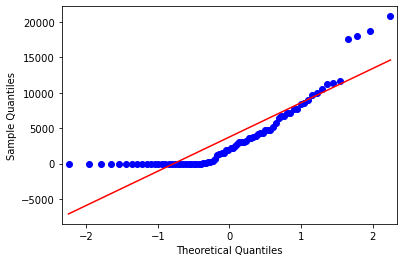

In [32]:
sm.qqplot(df_out[[var_]].sort_values([var_]).dropna(),line='s')
plt.show()

Indicating a positive skew

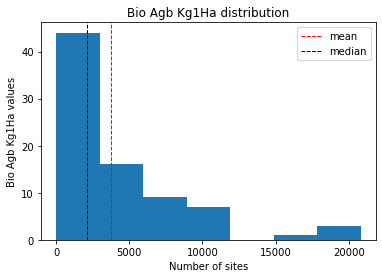

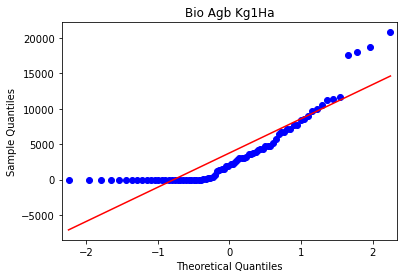

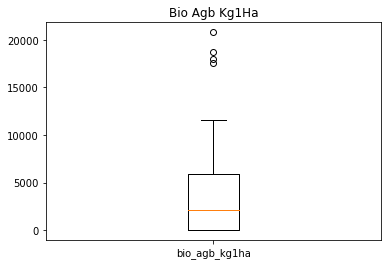

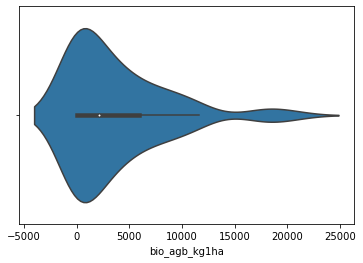

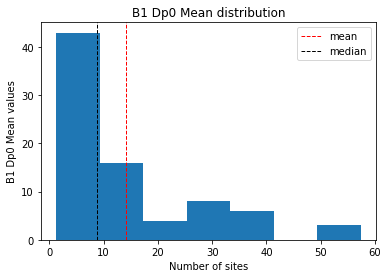

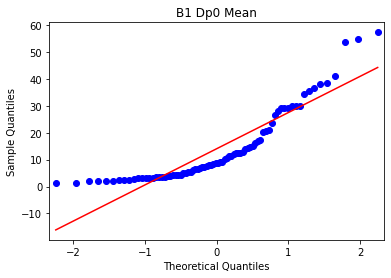

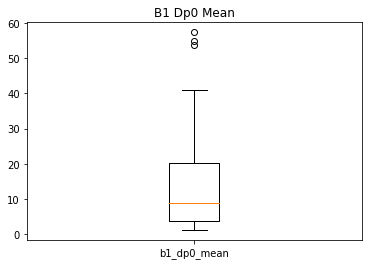

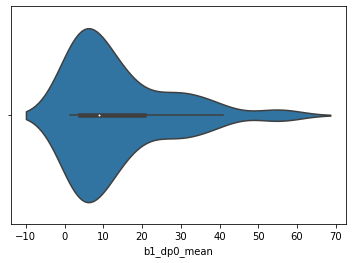

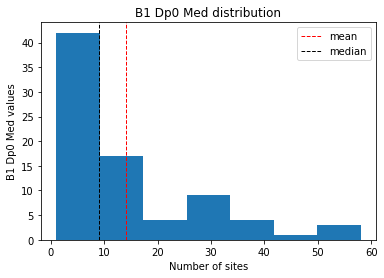

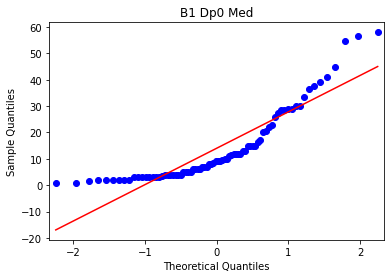

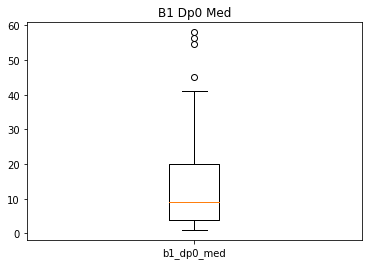

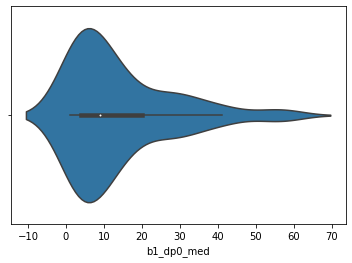

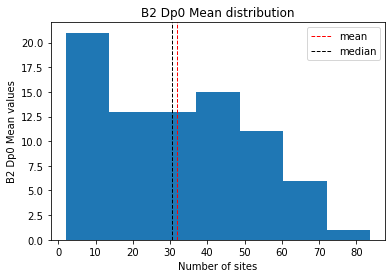

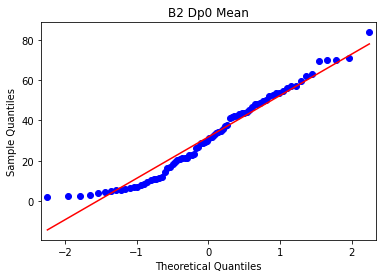

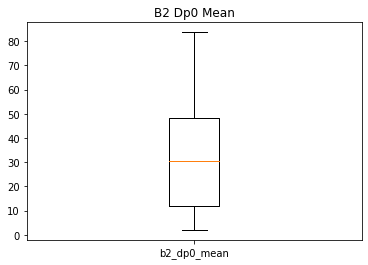

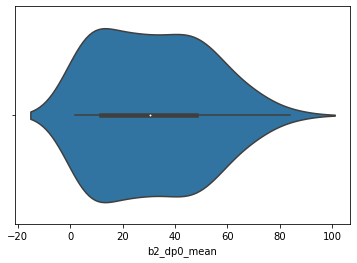

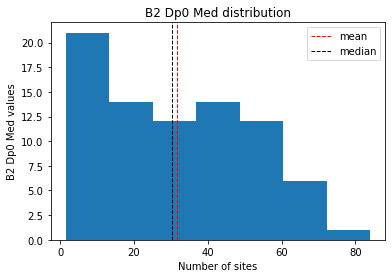

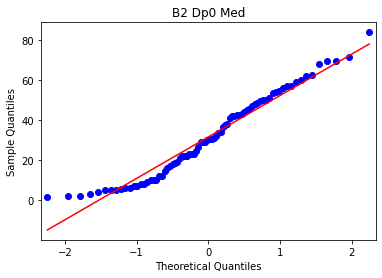

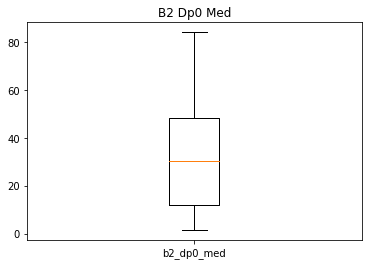

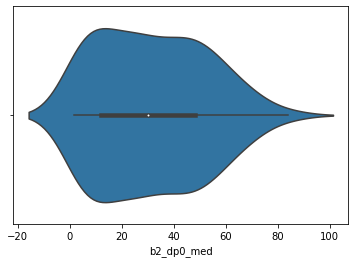

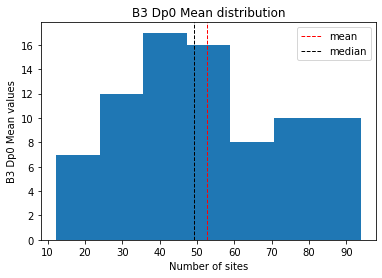

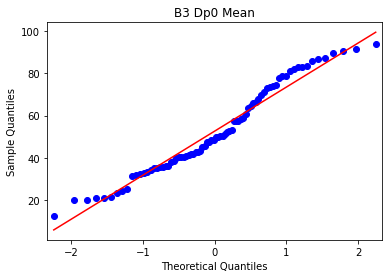

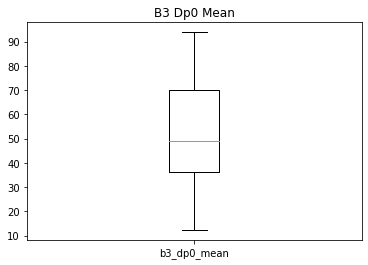

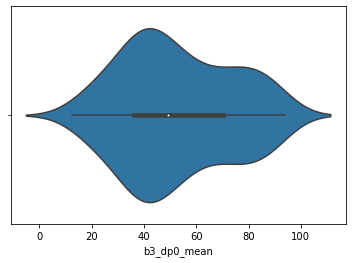

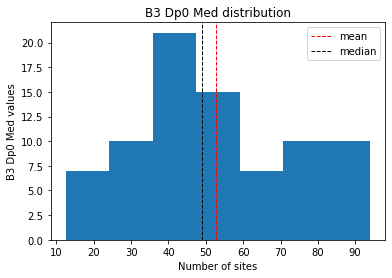

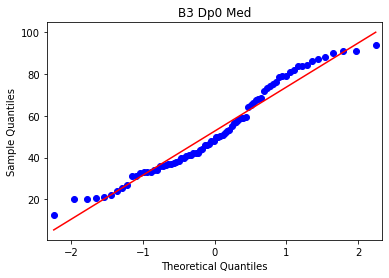

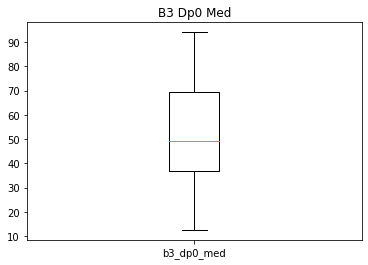

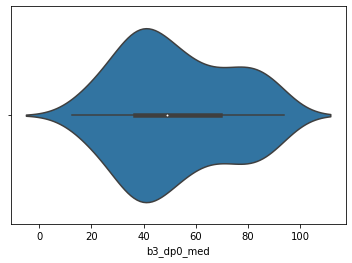

In [33]:
for i in key_var:
    plt.hist(df_out[i], bins=7)
    plt.axvline(df_out[i].mean(), color='red',
    linestyle='dashed', linewidth=1, label='mean')
    plt.axvline(df_out[i].median(), color='black',
    linestyle='dashed', linewidth=1, label='median')
    plt.title(i.title().replace("_", " ") + " distribution")
    plt.xlabel('Number of sites')
    plt.ylabel(i.title().replace("_", " ") + " values")
    plt.legend()

    plt.show()
    
    sm.qqplot(df_out[[i]].sort_values([i]).dropna(),line='s')
    plt.title(i.title().replace("_", " "))
    plt.show()
    
    plt.boxplot(df_out[i].dropna(), labels=[i])
    plt.title(i.title().replace("_", " "))
    plt.show()
    
    sns.violinplot(x=df_out[i])
    plt.show()
    print("="*50)
    



Violin plot:
 - the black bar with the white dot in the middle is the interquartile range
 - the white dot represents the median.
 - the height at each point (when the violin plot is horizontal) gives us the relative frequency. 
 - the thin black lines to the right/left of the interquartile range are the whiskers 
 - the extreme values are shown in the part of the distribution beyond the whiskers

In [34]:
df_key_out.skew()

bio_agb_kg1ha    1.661698
b1_dp0_mean      1.452079
b1_dp0_med       1.496551
b2_dp0_mean      0.312880
b2_dp0_med       0.314267
b3_dp0_mean      0.282093
b3_dp0_med       0.303692
dtype: float64

In [35]:
df_key_out.kurtosis()

bio_agb_kg1ha    2.649089
b1_dp0_mean      1.566195
b1_dp0_med       1.693503
b2_dp0_mean     -0.831158
b2_dp0_med      -0.857561
b3_dp0_mean     -0.921955
b3_dp0_med      -0.957232
dtype: float64

In [36]:
for var in key_var[1:]:

      stat, p = scistat.shapiro(df_key[var].dropna())

      print("feature=", var, "     p-value=", '{:.6f}'.format(p))

feature= b1_dp0_mean      p-value= 0.000000
feature= b1_dp0_med      p-value= 0.000000
feature= b2_dp0_mean      p-value= 0.003764
feature= b2_dp0_med      p-value= 0.003412
feature= b3_dp0_mean      p-value= 0.002068
feature= b3_dp0_med      p-value= 0.001166


In [37]:
thirdq, firstq = df_key_out[var_].quantile(0.75), df_key_out[var_].quantile(0.25)
interquartilerange = 1.5*(thirdq-firstq)
extvalhigh, extvallow = interquartilerange+thirdq, firstq-interquartilerange
print(extvallow, extvalhigh, sep=" <--> ")

-8891.189999999999 <--> 14818.649999999998


In [38]:
df.loc[df[var_]>extvalhigh].T

uid_x,105,106,5,7,28,30,8,9,4,1,4,5,1,2,3
site,jdr01,jdr02,girra01,hshr01,amg05,amg08,hsf01,hsf02,ep01,lit01,ntadac0001,ntadac0002,ntaarp0001,ntaarp0002,ntaarp0003
bio_agb_kg1ha,21469.1,22699.4,17994.8,35199.7,24670.8,29521.8,25701.7,26636.3,18757.2,25585.1,22881.1,20805.2,30472.4,24414.1,17598.4
b1_dp0_min,2,1,9,5,4,1,1,1,2,6,3,1,1,1,13
b1_dp0_max,9,5,12,17,13,3,4,6,4,13,4,6,4,4,30
b1_dp0_mean,5.25,2.25,10.6667,8.44444,9.25,2,2.58333,3.22222,2.4,8.66667,3.33333,3.16667,2.22222,2.33333,20.8333
b1_dp0_std,1.9632,1.03078,1.05409,3.62433,2.34965,0.816497,0.759203,1.5476,0.8,2.0548,0.471405,1.28019,1.0304,1.1547,5.30461
b1_dp0_med,5.5,2,10,8,9.5,2,3,3,2,8,3,3,2,2,20.5
b1_dp0_p25,4,1.75,10,6,8,1,2,2,2,7,3,2,1,1,16.75
b1_dp0_p50,5.5,2,10,8,9.5,2,3,3,2,8,3,3,2,2,20.5
b1_dp0_p75,6.25,3,12,10,11,3,3,4,2,10,4,4,3,3,24


In [39]:
df_key_out_out = df_key.loc[df_key[var_]<extvalhigh]

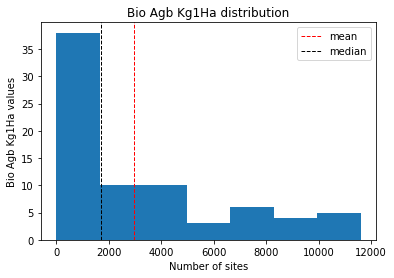

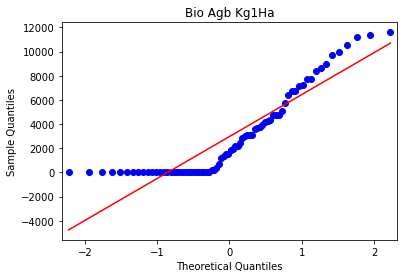

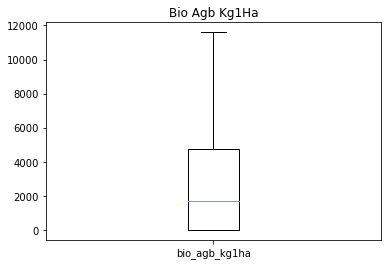

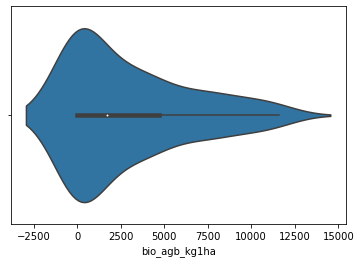

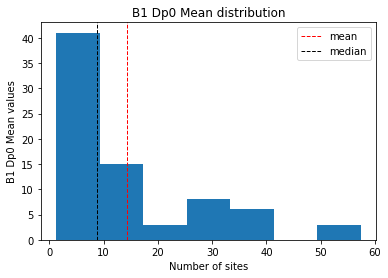

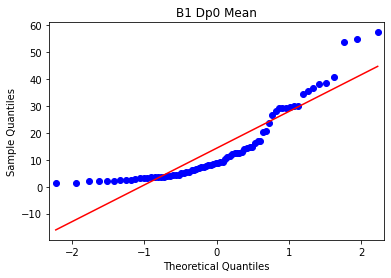

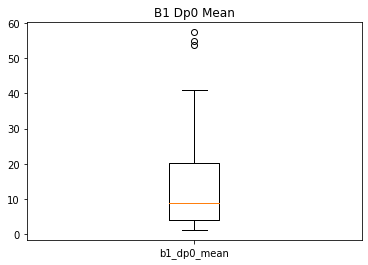

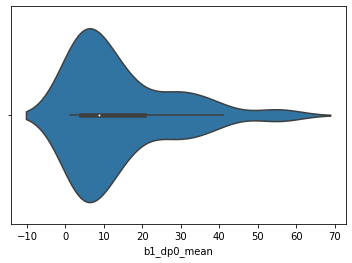

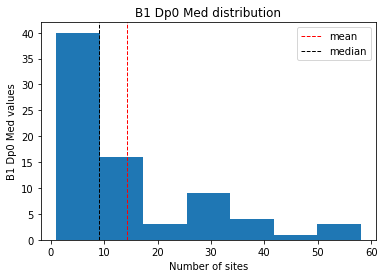

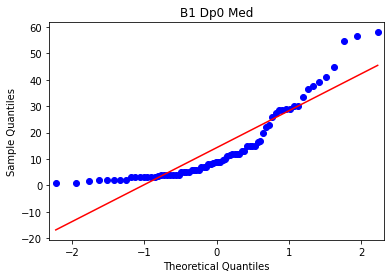

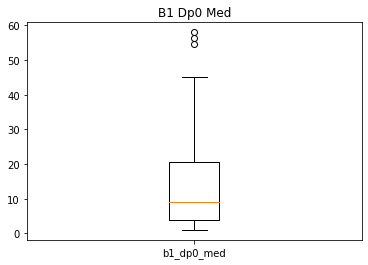

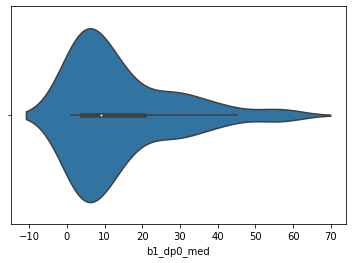

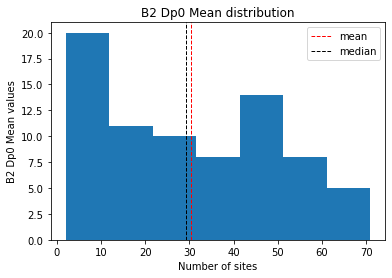

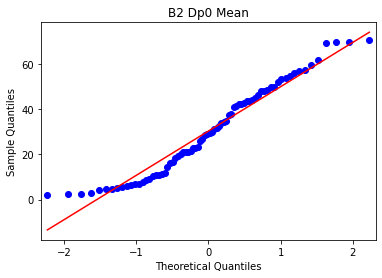

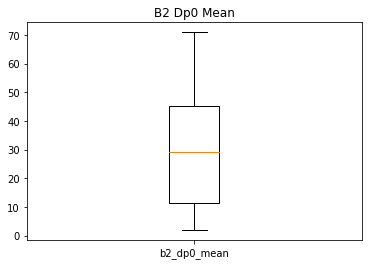

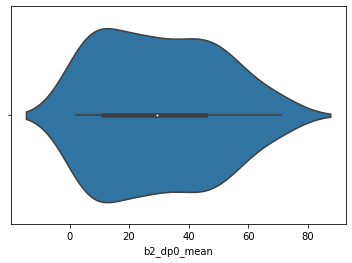

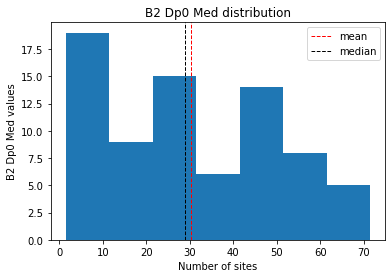

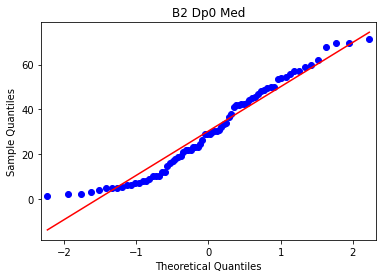

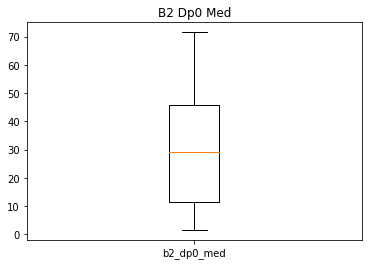

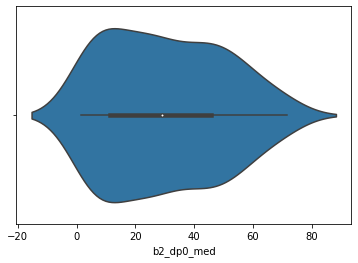

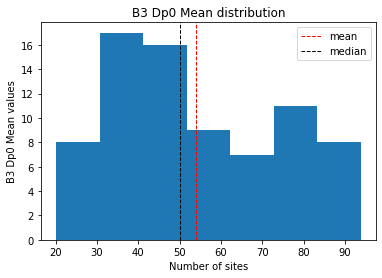

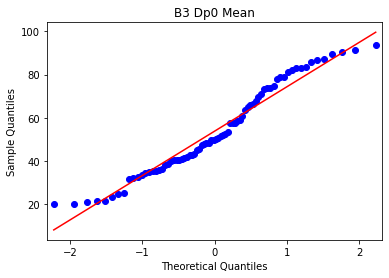

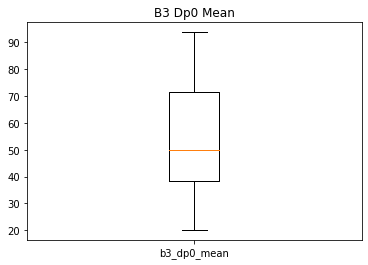

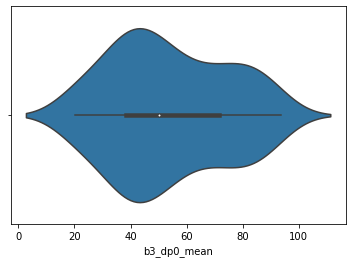

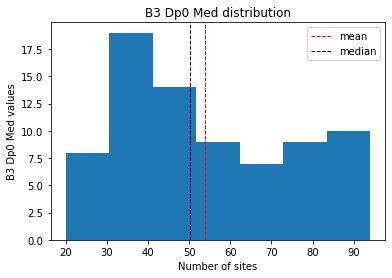

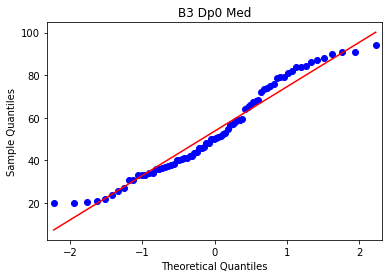

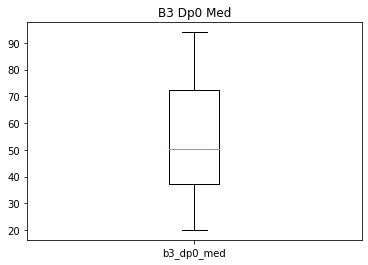

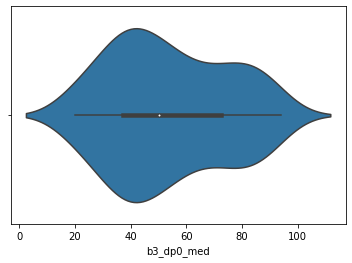

In [40]:
for i in key_var:
    plt.hist(df_key_out_out[i], bins=7)
    plt.axvline(df_key_out_out[i].mean(), color='red',
    linestyle='dashed', linewidth=1, label='mean')
    plt.axvline(df_key_out_out[i].median(), color='black',
    linestyle='dashed', linewidth=1, label='median')
    plt.title(i.title().replace("_", " ") + " distribution")
    plt.xlabel('Number of sites')
    plt.ylabel(i.title().replace("_", " ") + " values")
    plt.legend()

    plt.show()
    
    sm.qqplot(df_key_out_out[[i]].sort_values([i]).dropna(),line='s')
    plt.title(i.title().replace("_", " "))
    plt.show()
    
    plt.boxplot(df_key_out_out[i].dropna(), labels=[i])
    plt.title(i.title().replace("_", " "))
    plt.show()
    
    sns.violinplot(x=df_key_out_out[i])
    plt.show()
    print("="*50)
    